# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Call API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + units

# Create lists to hold API data
lats = []
lngs = []
temps = []
hums = []
winds = []
clouds = []
countries = []
dates = []
city_count = []

# Create loop for request and response
counter = 0

for city in cities[:10]:
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + units
    print(city)
    response = requests.get(query_url)
    
    # Add responses to lists and continue if city is not found
    # Print counter and city - add sleep time between calls
    try:
        response = response.json()
        lngs.append(response['coord']['lon'])
        lats.append(response['coord']['lat'])
        temps.append(response['main']['temp_max'])
        hums.append(response['main']['humidity'])
        winds.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        dates.append(response['dt'])
        countries.append(response['sys']['country'])
        city_count.append(city)
        counter = counter +1
        print(f"{counter} || {city}")
        time.sleep(1)
    except:
        print("city not found")
    

albany
1 || albany
ushuaia
2 || ushuaia
caravelas
3 || caravelas
anadyr
4 || anadyr
severo-kurilsk
5 || severo-kurilsk
takoradi
6 || takoradi
amderma
city not found
north platte
7 || north platte
uhryniv
8 || uhryniv
cape town
9 || cape town


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Add lists to dictionary
weather_dict = {
     "City": city_count,
     "Lat": lats,
     "Lng": lngs,
     "Max Temp": temps,
     "Humidity": hums,
     "Cloudiness": clouds,
     "Wind Speed": winds,
     "Country": countries,
     "Date": dates
}

# Create DataFrame
city_weather = pd.DataFrame(data = weather_dict)
city_weather.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,68.00,36,0,1.01,US,1602697702
1,ushuaia,-54.80,-68.30,44.60,67,40,26.40,AR,1602697880
2,caravelas,-17.71,-39.25,81.14,65,33,11.90,BR,1602697966
3,anadyr,64.75,177.48,37.40,84,40,11.18,RU,1602697924
4,severo-kurilsk,50.68,156.12,43.29,70,55,10.69,RU,1602697968


In [9]:
# Save city_weather to csv file
city_weather.to_csv("city_weather.csv")

#verify path
!pwd

/c/classrepo/HomeWork_out/PythonAPI_HW/python-api-challenge/WeatherPy


In [10]:
# Not required - stats
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,16.283333,10.295556,58.897778,65.888889,36.222222,11.643333,1.602698e+09
std,42.966763,98.553421,15.956086,17.567331,30.156997,7.424237,9.056321e+01
min,-54.800000,-100.770000,37.400000,36.000000,0.000000,1.010000,1.602698e+09
25%,-17.710000,-68.300000,44.600000,65.000000,20.000000,6.930000,1.602698e+09
50%,41.120000,-1.760000,64.400000,70.000000,37.000000,10.690000,1.602698e+09
75%,48.960000,24.690000,68.000000,77.000000,40.000000,11.900000,1.602698e+09
max,64.750000,177.480000,81.140000,85.000000,100.000000,26.400000,1.602698e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Get the indices of cities that have humidity over 100%.
max_humidity = city_weather[city_weather["Humidity"] > 100].index

# Droup cities with humidity > 100 creating a new DataFrame
clean_city_weather = city_weather.drop(max_humidity, inplace=False)
clean_city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,68.00,36,0,1.01,US,1602697702
1,ushuaia,-54.80,-68.30,44.60,67,40,26.40,AR,1602697880
2,caravelas,-17.71,-39.25,81.14,65,33,11.90,BR,1602697966
3,anadyr,64.75,177.48,37.40,84,40,11.18,RU,1602697924
4,severo-kurilsk,50.68,156.12,43.29,70,55,10.69,RU,1602697968
5,takoradi,4.88,-1.76,78.06,85,20,10.51,GH,1602697969
6,north platte,41.12,-100.77,64.40,39,1,19.46,US,1602697971
7,uhryniv,48.96,24.69,48.20,70,100,6.71,UA,1602697972
8,cape town,-33.93,18.42,64.99,77,37,6.93,ZA,1602697849


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [17]:
# Scatter plot of latitude vs max tempurature
def latitude_plots(compare):
    plt.scatter(clean_city_weather["Lat"], clean_city_weather[compare], marker="o")
    
    # Graph properties
    plt.title(f"City Latitude vs {compare} (10/13/2020)")
    plt.ylabel(compare)
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save figure
    plt.savefig(f"Lat_vs_{compare}.png")

    # Display
    plt.show()

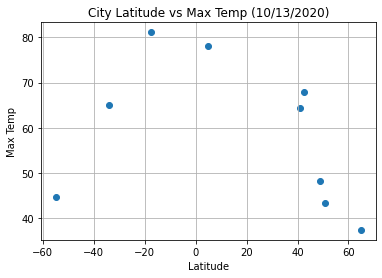

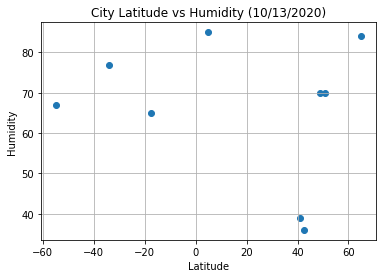

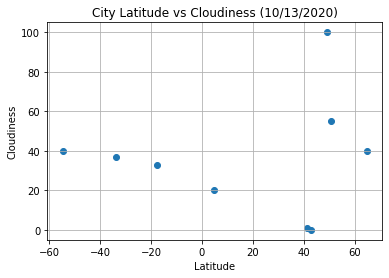

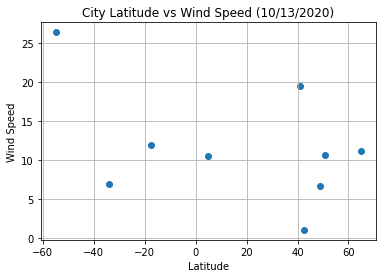

In [18]:
compare_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
for compare in compare_list:
    latitude_plots(compare)

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.46x +115.94
The r-value is: 0.9256436372025598


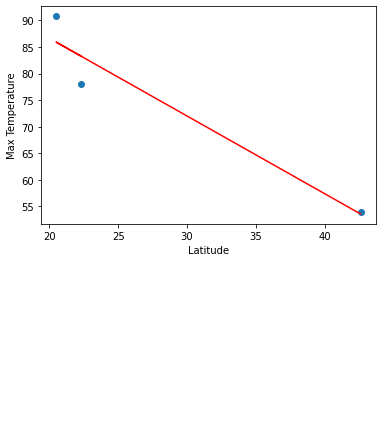

In [43]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.46x +115.94
The r-value is: 0.9256436372025598


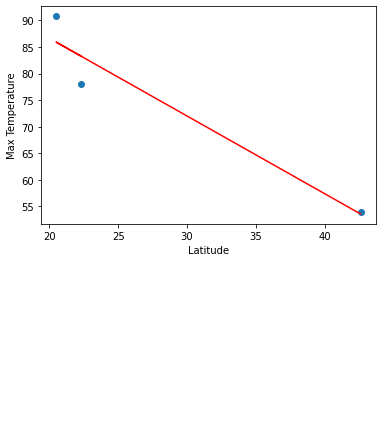

In [47]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 1.82x +13.62
The r-value is: 0.46463700802499586


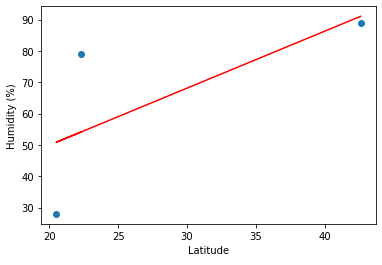

In [44]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 1.82x +13.62
The r-value is: 0.46463700802499586


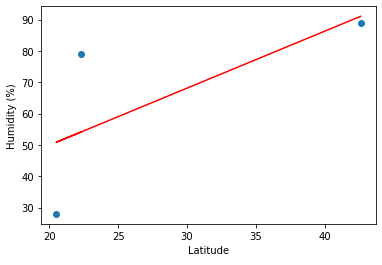

In [52]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.4x +83.72
The r-value is: 0.31563193292145136


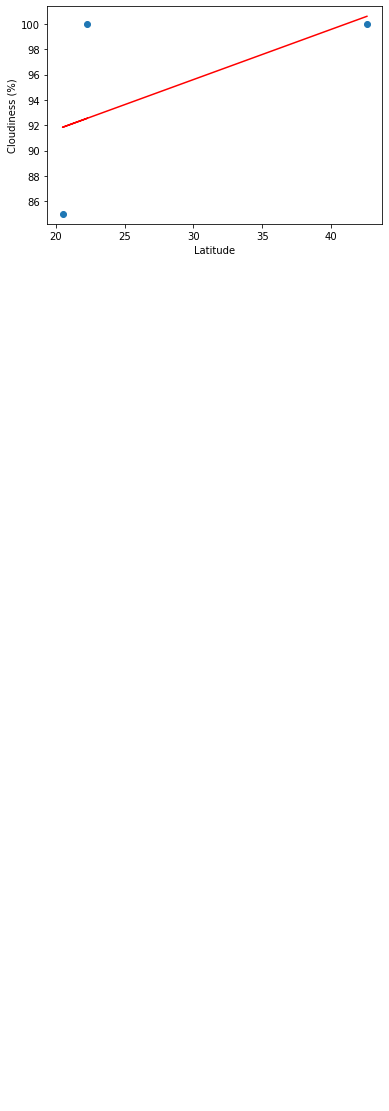

In [51]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.4x +83.72
The r-value is: 0.31563193292145136


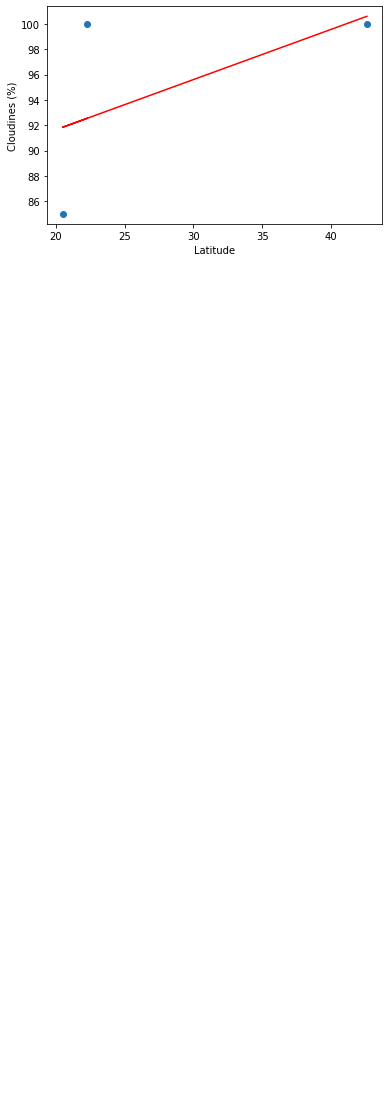

In [50]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudines (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.24x +15.94
The r-value is: 0.1408204398369378


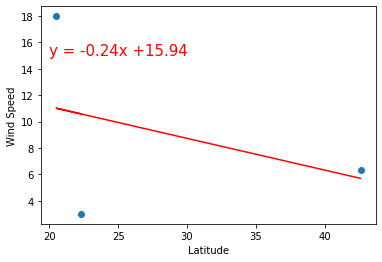

In [49]:
# Separate out northern hemisphere
northern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.24x +15.94
The r-value is: 0.1408204398369378


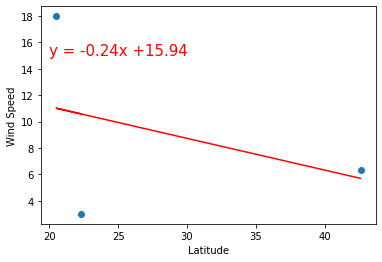

In [48]:
# Separate out southern hemisphere
southern_df = clean_city_weather.loc[clean_city_weather["Lat"] >= 0]

# Define X and Y values
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create and lable plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display graph
plt.show()